In [ ]:
##### Import libraries #####
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import SVG

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, classification_report

# 1. Load and Clean

In [ ]:
df = pd.read_csv(r'C:\Users\deept\Anaconda\DataFiles\car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_val']
df.info()
print("The data set has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1727 non-null   object
 1   maint      1727 non-null   object
 2   doors      1727 non-null   object
 3   persons    1727 non-null   object
 4   lug_boot   1727 non-null   object
 5   safety     1727 non-null   object
 6   class_val  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
The data set has 1727 rows and 7 columns.


In [ ]:
df.isna().any()

buying       False
maint        False
doors        False
persons      False
lug_boot     False
safety       False
class_val    False
dtype: bool

In [ ]:
for col in df.columns:
    print("Column:", col)
    print(df[col].value_counts(),'\n')

Column: buying
high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64 

Column: maint
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64 

Column: doors
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64 

Column: persons
4       576
more    576
2       575
Name: persons, dtype: int64 

Column: lug_boot
med      576
big      576
small    575
Name: lug_boot, dtype: int64 

Column: safety
med     576
high    576
low     575
Name: safety, dtype: int64 

Column: class_val
unacc    1209
acc       384
good       69
vgood      65
Name: class_val, dtype: int64 



In [ ]:

for i in df.columns:
    labels = df[i].unique()
    values = df[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for column: "{}"'.format(i),x=.5))
    fig.show()

In [ ]:
buying_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
maint_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
doors_type = CategoricalDtype(['2','3','4','5more'], ordered=True)
persons_type = CategoricalDtype(['2','4','more'], ordered=True)
lug_boot_type = CategoricalDtype(['small','med','big'], ordered=True)
safety_type = CategoricalDtype(['low','med','high'], ordered=True)
class_type = CategoricalDtype(['unacc','acc','good','vgood'], ordered=True)

In [ ]:
df.buying = df.buying.astype(buying_type)
df.maint = df.maint.astype(maint_type)
df.doors = df.doors.astype(doors_type)
df.persons = df.persons.astype(persons_type)
df.lug_boot = df.lug_boot.astype(lug_boot_type)
df.safety = df.safety.astype(safety_type)
df.class_val = df.class_val.astype(class_type)

# 2. Preprocessing

In [ ]:
df.buying=df.buying.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.maint=df.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.doors=df.doors.replace({'2':0, '3':1, '4':2, '5more':3})
df.persons=df.persons.replace({'2':0, '4':1, 'more':2})
df.lug_boot=df.lug_boot.replace({'small':0, 'med':1, 'big':2})
df.safety=df.safety.replace({'low':0, 'med':1, 'high':2})
df.class_val=df.class_val.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

df.head()

,buying,maint,doors,persons,lug_boot,safety,class_val
0,3,3,0,0,0,1,0
1,3,3,0,0,0,2,0
2,3,3,0,0,1,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


In [ ]:
# Choosing the features and target variables
X=df[df.columns[:-1]]
y=df['class_val']

In [ ]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modeling

In [ ]:
#Decision tree Classifier
# Initialize a decision tree estimator.
dt = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# Train the estimator.
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
# Print the tree in a simplified version.
r = export_text(dt, feature_names=X.columns.tolist())
print(r)

|--- safety <= 0.50
|   |--- class: 0
|--- safety >  0.50
|   |--- persons <= 0.50
|   |   |--- class: 0
|   |--- persons >  0.50
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- safety >  1.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- maint >  1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- safety >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- buying >  1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- lug_boot <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lug_boot >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- maint >  1.50
|   |   |   |   |--- buying <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- buying >  2.50
|   |   |   |   |   |--- class: 0



In [ ]:
# Make predictions.
dt_pred=dt.predict(X_test)

# CV score
dt_cv = cross_val_score(dt,X_train,y_train,cv=10)

In [ ]:
#Metrics for Decision tree
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, tr_pred))
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, tr_pred))
print('Accuracy: %.3f' % tr.score(X_test, y_test))
print('CV Accuracy: %.3f' % dt_cv.mean())

Mean squared error (MSE): 0.193
Mean absolute error (MAE): 0.150
Accuracy: 0.871
CV Accuracy: 0.861


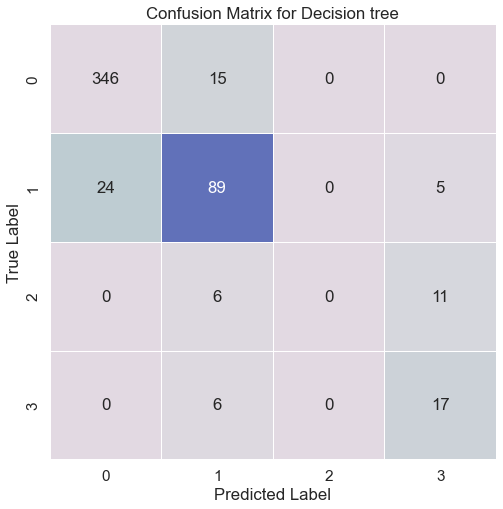

In [ ]:
#Confusion Matrix for Decision tree
dt_matrix = confusion_matrix(y_test,dt_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(dt_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

In [ ]:
#Grid search for Decision tree
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# Default Decision tree estimator.
default_dt = tree.DecisionTreeClassifier(random_state=42)

# GridSearchCV estimator.
gs_dt = GridSearchCV(default_dt, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_dt.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [ ]:
# Make predictions with the best parameters.
gs_dt_pred=gs_dt.predict(X_test)

In [ ]:
#Metrics for GridSearchCV Decision tree
print("Best Decision tree Parameters: {}".format(gs_dt.best_params_))
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_dt_pred))
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_dt_pred))
print('CV accuracy: %0.3f' % gs_dt.best_score_)
print('Accuracy: %0.3f' % (gs_dt.score(X_test,y_test)))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 11}
Mean squared error (MSE): 0.046
Mean absolute error (MAE): 0.039
CV accuracy: 0.983
Accuracy: 0.965


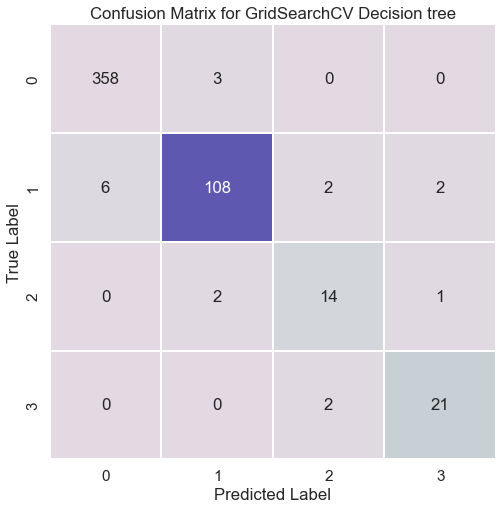

In [ ]:
#Confusion Matrix for GridSearchCV Decision tree
gs_dt_matrix = confusion_matrix(y_test,gs_dt_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(gs_dt_matrix,annot=True, cbar=False, cmap='twilight', linewidth=0.4, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

In [ ]:
###### Neural network (Multi Layer Perceptron) ######
# Initialize a Multi-layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000, random_state=42, shuffle=True, verbose=False)

# Train the classifier
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=42)

In [ ]:
# Make predictions
mlp_pred = mlp.predict(X_test)

# CV score
mlp_cv = cross_val_score(mlp,X_train,y_train,cv=10)

In [ ]:
#Metrics for Neural Network (MLP)
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, mlp_pred))
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, mlp_pred))
print('Accuracy: %.3f' % mlp.score(X_test, y_test))
print('CV Accuracy: %.3f' % mlp_cv.mean())

Mean squared error (MSE): 0.123
Mean absolute error (MAE): 0.100
Accuracy: 0.911
CV Accuracy: 0.924


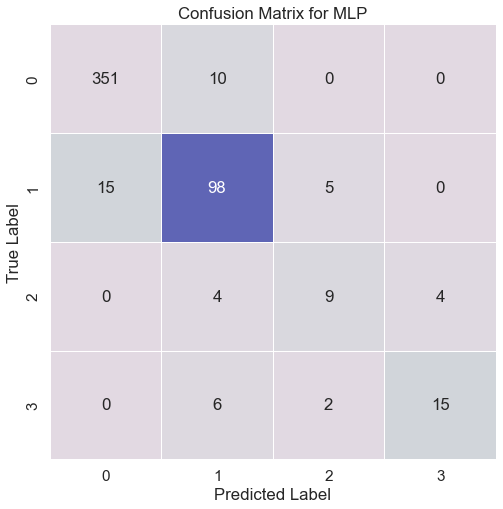

In [ ]:
# Plot confusion matrix for MLP.
mlp_matrix = confusion_matrix(y_test,mlp_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP');

In [ ]:
#Grid search for Neural Network
parameters = {'activation':['logistic','tanh','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(5),(100),(3),(4),(3,1),(5,3)]}

# MLP estimator.
default_mlp = MLPClassifier(random_state=42)

# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([0.1 , 0.01]),
                         'hidden_layer_sizes': [5, 100, 3, 4, (3, 1), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=1)

In [ ]:
# Make predictions with the best parameters.
gs_mlp_pred=gs_mlp.predict(X_test)

In [ ]:
#Metrics for GridSearchCV MLP
print("Best MLP Parameters: {}".format(gs_mlp.best_params_))
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_mlp_pred))
print("Average absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_mlp_pred))
print('CV accuracy: %0.3f' % gs_mlp.best_score_)
print('Accuracy: %0.3f' % (gs_mlp.score(X_test,y_test)))

Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}
Mean squared error (MSE): 0.015
Average absolute error (MAE): 0.012
CV accuracy: 0.992
Accuracy: 0.990


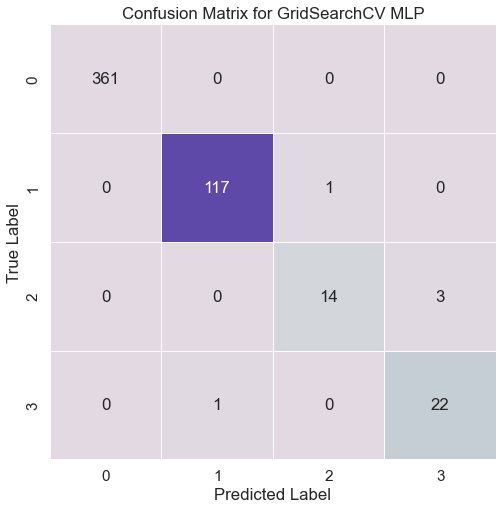

In [ ]:
# Print confusion matrix for GridSearchCV MLP.
gs_mlp_matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(gs_mlp_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV MLP');

# 4. Plot Results

In [ ]:
# Ploting metrics
errors=['Accuracy','CV-accuracy','MSE', 'MAE']

fig = go.Figure(data=[
    go.Bar(name='Decision tree', x=errors, y=[dt.score(X_test, y_test),dt_cv.mean(),mean_squared_error(y_test, dt_pred), mean_absolute_error(y_test, dt_pred)]),
    go.Bar(name='MLP', x=errors, y=[mlp.score(X_test, y_test),mlp_cv.mean(),mean_squared_error(y_test, mlp_pred), mean_absolute_error(y_test, mlp_pred)]),
    go.Bar(name='Optimized Decision tree', x=errors, y=[gs_dt.score(X_test, y_test),gs_dt.best_score_,mean_squared_error(y_test, gs_dt_pred), mean_absolute_error(y_test, gs_dt_pred)]),
    go.Bar(name='Optimized MLP', x=errors, y=[gs_mlp.score(X_test, y_test),gs_mlp.best_score_,mean_squared_error(y_test, gs_mlp_pred), mean_absolute_error(y_test, gs_mlp_pred)])
])

fig.update_layout(
    title='Metrics for each model',
    xaxis_tickfont_size=14,
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

In [ ]:
#Table of metrics
d={
'': ['Decision Tree','Optimized Decision Tree','Neural Network (MLP)','Optimized Neural Network (MLP)'],
'Accuracy': [dt.score(X_test, y_test),gs_dt.score(X_test,y_test),mlp.score(X_test, y_test),gs_mlp.score(X_test, y_test)],
'CV Accuracy': [dt_cv.mean(),gs_dt.best_score_,mlp_cv.mean(),gs_mlp.best_score_],
'MSE': [mean_squared_error(y_test, dt_pred), mean_squared_error(y_test, gs_dt_pred),mean_squared_error(y_test, mlp_pred),mean_squared_error(y_test, gs_mlp_pred)],
'MAE': [mean_absolute_error(y_test, dt_pred), mean_absolute_error(y_test, gs_dt_pred),mean_absolute_error(y_test, mlp_pred),mean_absolute_error(y_test, gs_mlp_pred)]
}

results=pd.DataFrame(data=d).round(2).set_index('')
results

,Accuracy,CV Accuracy,MSE,MAE
,,,,
Decision Tree,0.87,0.86,0.19,0.15
Optimized Decision Tree,0.97,0.98,0.05,0.04
Neural Network (MLP),0.91,0.92,0.12,0.10
Optimized Neural Network (MLP),0.99,0.99,0.02,0.01
